Topics you need to know before you start:

* Universal Approximation Theorem
* Linear transformations
* Matrix multiplication
* Activation functions
* Forward Propagation / Backpropagation
* Gradient descent
* Chain rule
* Partial Derivatives
* Euler's number

<h1> MLP From Scratch (All formulas)</h1>

$ Feed forward: $

$$z^l_j = \sum_k w^l_{jk} a^{l-1}_k + b^l_j$$

$$a^l = \sigma(z^l)$$


$ Backpropagation: $

Calculating delta for output layer:

$$\delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)$$

$$ Or: $$
$$\delta^L = \nabla_a C \odot \sigma'(z^L)$$

Example:

$$
\Large
\nabla_a C = 
\begin{bmatrix}
\frac{\partial C_0}{\partial a^L_{0,0}} & \frac{\partial C_0}{\partial a^L_{1,0}} & \cdots & \frac{\partial C_0}{\partial a^L_{j,0}} \\
\frac{\partial C_1}{\partial a^L_{0,1}} & \frac{\partial C_1}{\partial a^L_{1,2}} & \cdots & \frac{\partial C_1}{\partial a^L_{j,1}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial C_x}{\partial a^L_{0,x}} & \frac{\partial C_x}{\partial a^L_{1,x}} & \cdots & \frac{\partial C_x}{\partial a^L_{j,x}}
\end{bmatrix}
$$

Calculating delta for hidden layers:

$$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)$$

Changing loss respect to bias (Chain rule):

$$\frac{\partial C}{\partial b^l_j} = \delta^l_j$$

Changing loss respect to weight (Chain rule):

$$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$$

Updating weights and biases:

$$
w^l \leftarrow w^l - \frac{\eta}{m} \sum_x \delta_{x,l} (a^{l-1}_x)^T
$$

$$
b^l \leftarrow b^l - \frac{\eta}{m} \sum_x \delta_{x,l}
$$

$
\begin{aligned}
& C \text{ - cost/loss function } \\
& \sigma \text{ - activation function (sigmoid, Relu etc.)} \\
& \delta \text{ - the gradient of the error with respect to the output of a neuron } \\
& w \text{ - weight } \\
& b \text{ - bias } \\
& z \text{ - preactivated neuron } \\
& a \text{ - activated neuron } \\
& l \text{ - layer } \\
& j \text{ - to neuron } \\
& k \text{ - from neuron }\\
& x \text{ - sample } 
\end{aligned}
$


In [1]:
import numpy as np

<h1>Initialization</h1>

<h4> Step 1. Defining Architecture Hyperparameters</h4>

* Number of layers (depth): 2
* Number of neurons in each layer (width): 2, 4
* Activation function for each layer: ReLU, Sigmoid


In [2]:
input_size = 2
hidden_layer_size = 4 # width
output_layer_size = 1 # width

weights_layer1 = np.random.rand(input_size, hidden_layer_size)
biases_layer1 = np.random.rand(hidden_layer_size)

weights_layer2 = np.random.rand(hidden_layer_size, output_layer_size)
biases_layer2 = np.random.rand(output_layer_size)

def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


<h2>Here on the example of MLP with 2 inputs, 4 hidden layers 
(relu activation) and 1 output layer with sigmoid activation </h2>

<div style='display: flex; justify-content: center'; > <img src='img/example_mlp.png'> </div>

<h4> Step 2. Defining Training Hyperparameters</h4>

* Batch size: 12
* Number of epochs: skipped here
* Learning rate: 0.01
* Loss function: Mean Squared Error (MSE)


In [3]:
batch_size = 12
learning_rate = 0.01

<h1>Predicting (Feedforward computation step by step) </h1>

<h4> Step 1. Calculation of neuron outputs for layer 1</h4>

$$
z^l_j = \sum_k w^l_{jk} a^{l-1}_k + b^l_j
$$

$$
a^l = \sigma(z^l)
$$

$$
\begin{bmatrix}
    a^{0}_{0,0} & a^{0}_{1,0} \\
    a^{0}_{0,1} & a^{0}_{1,1} \\
    a^{0}_{0,2} & a^{0}_{1,2} \\
    \dots & \dots \\
    a^{0}_{0,x} & a^{0}_{1,x} \\
\end{bmatrix}
\times
\begin{bmatrix}
    w^1_{00} & w^1_{10} &  w^1_{20} &  w^1_{30} \\
    w^1_{01} & w^1_{11} &  w^1_{21} &  w^1_{31} \\
\end{bmatrix}
+
\begin{bmatrix}
    b^{1}_0 & b^{1}_1 & b^{1}_2  & b^{1}_3
\end{bmatrix}
=
ReLU 
\left(
\begin{bmatrix}
    z^{1}_{0,0} & z^{1}_{1,0} & z^{1}_{2,0} & z^{1}_{3,0} \\
    z^{1}_{0,1} & z^{1}_{1,1} & z^{1}_{2,1} & z^{1}_{3,1} \\
    z^{1}_{0,2} & z^{1}_{1,2} & z^{1}_{2,2} & z^{1}_{3,2} \\
    \dots & \dots & \dots & \dots \\
    z^{1}_{0,x} & z^{1}_{1,x} & z^{1}_{2,x} & z^{1}_{3,x} \\
\end{bmatrix}
\right)
=
\begin{bmatrix}
    a^{1}_{0,0} & a^{1}_{1,0} & a^{1}_{2,0} & a^{1}_{3,0} \\
    a^{1}_{0,1} & a^{1}_{1,1} & a^{1}_{2,1} & a^{1}_{3,1} \\
    a^{1}_{0,2} & a^{1}_{1,2} & a^{1}_{2,2} & a^{1}_{3,2} \\
    \dots & \dots & \dots & \dots \\
    a^{1}_{0,x} & a^{1}_{1,x} & a^{1}_{2,x} & a^{1}_{3,x} \\
\end{bmatrix}
$$

$
\begin{aligned}
& x \text{ - Sample index (here equal to batch size)  } 
\end{aligned} \\
$



In [4]:
inputs = np.random.rand(batch_size, input_size)

preactivated_neurons_layer1 = np.dot(inputs, weights_layer1) + biases_layer1
activated_neurons_layer1 = relu(preactivated_neurons_layer1)

<h4> Step 2. Calculation of neuron outputs for layer 2</h4>


$$
\begin{bmatrix}
    a^{1}_{0,0} & a^{1}_{1,0} & a^{1}_{2,0} & a^{1}_{3,0} \\
    a^{1}_{0,1} & a^{1}_{1,1} & a^{1}_{2,1} & a^{1}_{3,1} \\
    a^{1}_{0,2} & a^{1}_{1,2} & a^{1}_{2,2} & a^{1}_{3,2} \\
    \dots & \dots \\
    a^{1}_{0,x} & a^{1}_{1,x} & a^{1}_{2,x} & a^{1}_{3,x} \\
\end{bmatrix}
\times
\begin{bmatrix}
    w^2_{0,0} \\
    w^2_{0,1} \\
    w^2_{0,2} \\
    w^2_{0,3} \\
\end{bmatrix}
+
\begin{bmatrix}
    b^{2}_0 
\end{bmatrix}
=
Sigmoid(
\begin{bmatrix}
    z^{2}_0 
\end{bmatrix}
)
=
\begin{bmatrix}
    a^{2}_0 
\end{bmatrix}
Or
\begin{bmatrix}
    \hat{y}_0 
\end{bmatrix}
$$


In [5]:
preactivated_neurons_layer2 = np.dot(activated_neurons_layer1, weights_layer2) + biases_layer2
y_predicted = sigmoid(preactivated_neurons_layer2)

<h2> Hand written version<h2>
<div style='display: flex; justify-content: center'; > <img src='img/feedforward.jpeg' width='70%' height='70%'> </div>

<h1> Training (Backpropagation algorithm computation step by step) </h1>


<h4> Step 1. Calculate the delta for the output Layer 2 (L):</h4>

$$
\Large
\delta^2 = 
\begin{bmatrix}
\frac{\partial C_0}{\partial a^2_{0,0}} \\
\frac{\partial C_1}{\partial a^2_{0,1}} \\
\vdots \\
\frac{\partial C_x}{\partial a^2_{0,x}}
\end{bmatrix}
\odot 
\begin{bmatrix}
\sigma'(z^2_{0,0}) \\
\sigma'(z^2_{0,1}) \\
\vdots \\
\sigma'(z^2_{0,x})
\end{bmatrix}
=
\begin{bmatrix}
\delta^2_0 \\
\delta^2_1 \\
\vdots \\
\delta^2_x
\end{bmatrix}
$$

$$ 
\text{for MSE  } \frac{\partial C_x}{\partial a^L_{j,x}} = \hat a - a^L_{j,x}
$$

$$ 
\text{for Sigmoid } \sigma'(z^L_{j,x}) = a^L_{j,x}(1 -  a^L_{j,x})
$$

$
\begin{aligned}
& \hat a \text{ - true value } \\
& a \text{ - activated output of } {j}^{th} \text{ neuron in L layer} \\
& x \text{ - Sample index (here equal to batch size)  } 
\end{aligned} \\
\text{And here j = 0 since we have only 1 neuron in the output layer}
$


In [12]:
y_true = np.random.rand(batch_size, 1) # simulated true values


def df_loss_mse(y_true, y_pred):
  return y_pred - y_true

def df_sigmoid(activated_output):
  return activated_output * (1 - activated_output)

def df_relu(x):
  return np.where(x > 0, 1, 0)

grad_loss = df_loss_mse(y_true, y_predicted)
output_delta = grad_loss * df_sigmoid(y_predicted)

<h4> Step 2. Calculate change of loss (gradient) respect to biases and weights: </h4>


$$\frac{\partial C}{\partial w^2_{jk}} = a^{1}_k \delta^2_j$$
Matrix form:

$$\frac{\partial C}{\partial W^{[2]}} = (A^{[1]})^T \delta^{[2]}$$


In [7]:
vw_loss_output = np.dot(activated_neurons_layer1.T, output_delta)

$$\frac{\partial C}{\partial b^2_j} = \delta^2_j$$

In [8]:
# sum axis = 0 means sum for each sample
vb_loss_output = np.sum(output_delta, axis=0, keepdims=True)

Update weights to find global minima (Gradient Descent principle)


$$
W^{[2]}_{new} = W^{[2]}_{old} -  \frac{\eta}{m}\frac{\partial C}{\partial W^{[2]}} 
$$

Or:

$$
w^2 \leftarrow w^2 - \frac{\eta}{m} \sum_x \delta_{x,2} (a^{1}_x)^T
$$

* m = batch_size
* $\eta$ = learning_rate

Hint: we divide batch_size to learning_rate, since learning_rate is considering for whole dataset during training (1 epoch), to average the gradients over the batch.

In [9]:
weights_layer2 = weights_layer2 - (learning_rate / batch_size) * vw_loss_output

Update biases:
$$
B^{[2]}_{new} = B^{[2]}_{old} -  \frac{\eta}{m}\frac{\partial C}{\partial B^{[2]}} 
$$
Or:
$$
b^2 \leftarrow b^2 - \frac{\eta}{m} \sum_x \delta_{x,2}
$$


In [10]:
biases_layer2 = biases_layer2 - (learning_rate / batch_size) * vb_loss_output

$$ (w^{2})^T \delta^{2}$$

In [11]:
propageted_error = np.dot(output_delta, weights_layer2.T)

$$\delta^1 = ((w^{2})^T \delta^{2}) \odot \sigma'(z^1)$$

In [ ]:
# Calculate delta for hidden layer
hidden_derivative_activated = df_relu(activated_neurons_layer1)
hidden_delta = propageted_error * hidden_derivative_activated

$$\frac{\partial C}{\partial w^1_{jk}} = a^{0}_k \delta^1_j$$

In [ ]:
# Calculate the gradient for hidden layer weights and biases
vw_loss_hidden = np.dot(inputs.T, hidden_delta)

$$\frac{\partial C}{\partial b^1_j} = \delta^1_j$$


In [15]:
vb_loss_hidden = np.sum(hidden_delta, axis=0, keepdims=True)


$$
w^1 \leftarrow w^1 - \frac{\eta}{m} \sum_x \delta_{x,1} (a^{0}_x)^T
$$


In [16]:
# Update weights and biases for the hidden layer where a0 is inputs
weights_layer1 = weights_layer1 - (learning_rate / batch_size) * vw_loss_hidden

$$
b^1 \leftarrow b^1 - \frac{\eta}{m} \sum_x \delta_{x,1}
$$

In [17]:
# Update biases for the hidden layer
biases_layer1 = biases_layer1 - (learning_rate / batch_size) * vb_loss_hidden

<h2> Hand written version <h2>
<div style='display: flex; justify-content: center'; > <img src='img/backpropagation.jpeg' width='70%' height='70%'> </div>

# Training Loop (All together)

In [438]:
# initialize weights and biases

input_size = 2
hidden_layer_size = 4 # width
output_layer_size = 1 # width

weights_layer1 = np.random.rand(input_size, hidden_layer_size)
biases_layer1 = np.random.rand(hidden_layer_size)

weights_layer2 = np.random.rand(hidden_layer_size, output_layer_size)
biases_layer2 = np.random.rand(output_layer_size)

def feedforward(X):
  preactivated_neurons_layer1 = np.dot(X, weights_layer1) + biases_layer1
  activated_neurons_layer1 = relu(preactivated_neurons_layer1)

  preactivated_neurons_layer2 = np.dot(activated_neurons_layer1, weights_layer2) + biases_layer2
  y_predicted = sigmoid(preactivated_neurons_layer2)
  return y_predicted

def backpropagation(X, y_true):
  preactivated_neurons_layer1 = np.dot(X, weights_layer1) + biases_layer1
  activated_neurons_layer1 = relu(preactivated_neurons_layer1)

  preactivated_neurons_layer2 = np.dot(activated_neurons_layer1, weights_layer2) + biases_layer2
  y_predicted = sigmoid(preactivated_neurons_layer2)

  grad_loss = df_loss_mse(y_true, y_predicted)
  output_delta = grad_loss * df_sigmoid(y_predicted)

  vw_loss_output = np.dot(activated_neurons_layer1.T, output_delta)
  vb_loss_output = np.sum(output_delta, axis=0, keepdims=True)

  propageted_error = np.dot(output_delta, weights_layer2.T)
  hidden_derivative_activated = df_relu(activated_neurons_layer1)
  hidden_delta = propageted_error * hidden_derivative_activated

  vw_loss_hidden = np.dot(X.T, hidden_delta)
  vb_loss_hidden = np.sum(hidden_delta, axis=0, keepdims=True)

  return vw_loss_output, vb_loss_output, vw_loss_hidden, vb_loss_hidden


def update_weights_biases(vw_loss_output, vb_loss_output, vw_loss_hidden, vb_loss_hidden, batch_size, learning_rate):
  global weights_layer2, biases_layer2, weights_layer1, biases_layer1

  weights_layer2 = weights_layer2 - (learning_rate / batch_size) * vw_loss_output
  biases_layer2 = biases_layer2 - (learning_rate / batch_size) * vb_loss_output

  weights_layer1 = weights_layer1 - (learning_rate / batch_size) * vw_loss_hidden
  biases_layer1 = biases_layer1 - (learning_rate / batch_size) * vb_loss_hidden


def train_one_epoch(X, y_true, batch_size, learning_rate):
  num_samples = X.shape[0]
  for i in range(0, num_samples, batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y_true[i:i+batch_size]

    vw_loss_output, vb_loss_output, vw_loss_hidden, vb_loss_hidden = backpropagation(X_batch, y_batch)
    update_weights_biases(vw_loss_output, vb_loss_output, vw_loss_hidden, vb_loss_hidden, X_batch.shape[0], learning_rate)


# Data and visualization

X_train shape: (210, 2)
y_train shape: (210,)
X_test shape: (90, 2)
y_test shape: (90,)


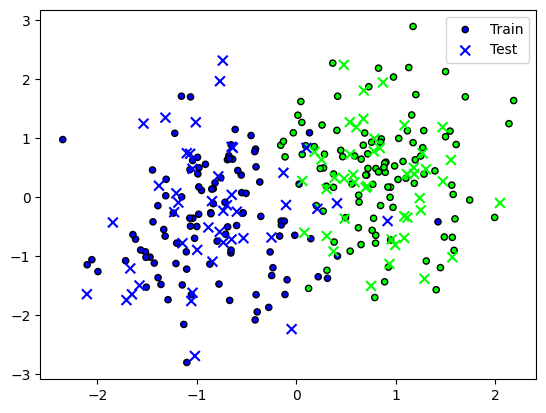

In [411]:
from plot import draw_nn
from utils import standard_scaler, train_test_split, to_categorical, make_blobs
import matplotlib.pyplot as plt

def plot_decision_boundary(forward, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')

n_features = 2
n_classes = 2
n_samples= 300
cluster_std = 2


X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=cluster_std, random_state=np.random.randint(0, 1000))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = standard_scaler(X_train)
X_test = standard_scaler(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')

plt.legend()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Train by executing the cell below

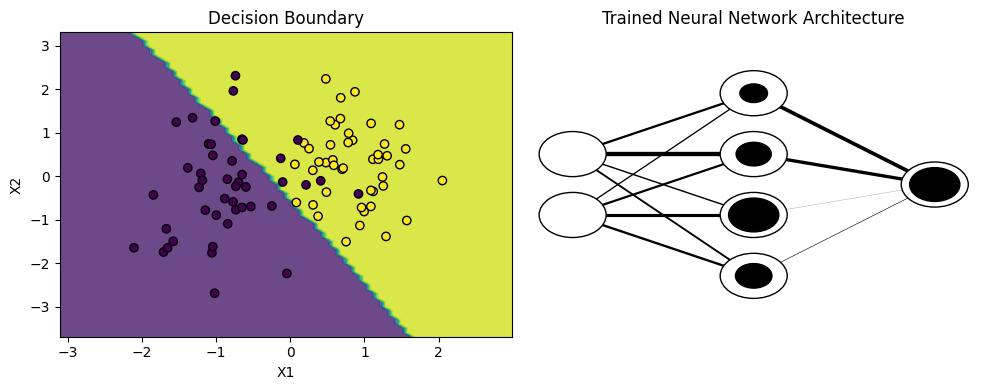

In [494]:
reshaped_y_true = y_train.reshape(-1, 1) 

train_one_epoch(X_train, reshaped_y_true, batch_size=12, learning_rate=0.01)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Decision Boundary plot
plt.sca(ax1)
ax1.set_title('Decision Boundary')
plot_decision_boundary(feedforward, X_test, y_test.reshape(-1, 1))

# Neural Network Architecture plot
ax2.set_title('Trained Neural Network Architecture')
draw_nn(
    ax2,
    .1, .9, .1, .9,
    [input_size, hidden_layer_size, output_layer_size],
    [weights_layer1, weights_layer2],
    [biases_layer1, biases_layer2]
)
ax2.axis('off')

plt.tight_layout()
plt.show()